k-means clustering is an unsupervised machine learning algorithm that seeks to segment a dataset into groups based on the similarity of datapoints. An unsupervised model has independent variables and no dependent variables.


**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

First generate a dataset of groups in 2-dimensional space. The sklearn.datasets function make_blobs creates groupings of 2-dimensional normal distributions, and assigns a label corresponding to the group said point belongs to.

In [2]:
# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

To calculate the distances between a point and a dataset of points multiple times in this algorithm define a function that calculates Euclidean distances.

In [3]:
def euclidean(point, data):
    """
    Return euclidean distances between a point & a dataset
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [4]:
def most_common(lst):
    """
    Return the most frequently occuring element in a list.
    """
    return max(set(lst), key=lst.count)

The k-means clustering algorithm is initialized with a value for k and a maximum number of iterations for finding the optimal centroid locations. If a maximum number of iterations is not considered when optimizing centroid locations, there is a risk of running an infinite loop.

In [5]:
class KMeans:

    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):

        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            self.centroids += [X_train[new_centroid_idx]]

        # This method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs




Lets train and test it on our original dataset and see the results. We’ll keep our original method of plotting our data, by separating the true labels by color, but now we’ll additionally separate the predicted labels by marker style, to see how the model performs.

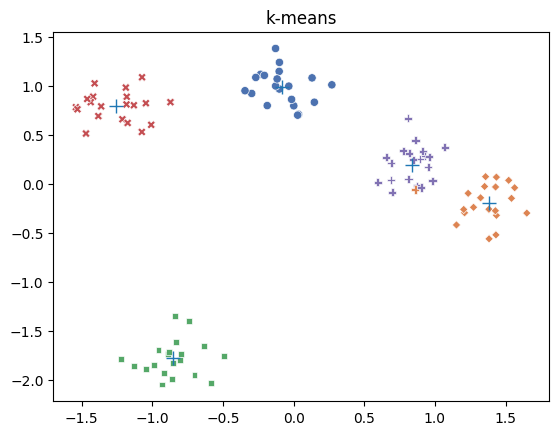

In [6]:
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.title("k-means")
plt.show()